In [1]:
# imports

import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import random
from sklearn.model_selection import train_test_split

# Cargar datos

In [2]:
path = Path('data')
os.listdir(path)

['extra',
 'label_num_to_disease_map.json',
 'sample_submission.csv',
 'test_images',
 'train.csv',
 'train_extra.csv',
 'train_images',
 'train_processed.csv']

In [3]:
train = pd.read_csv(path/'train.csv')
train

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
...,...,...
21392,999068805.jpg,3
21393,999329392.jpg,3
21394,999474432.jpg,1
21395,999616605.jpg,4


In [4]:
train['image_id'] = train['image_id'].apply(lambda x: f'train_images/{x}')
train

,image_id,label
0,train_images/1000015157.jpg,0
1,train_images/1000201771.jpg,3
2,train_images/100042118.jpg,1
3,train_images/1000723321.jpg,1
4,train_images/1000812911.jpg,3
...,...,...
21392,train_images/999068805.jpg,3
21393,train_images/999329392.jpg,3
21394,train_images/999474432.jpg,1
21395,train_images/999616605.jpg,4


In [5]:
train.to_csv(path/'train_processed.csv', index=False)

# Distribución clases

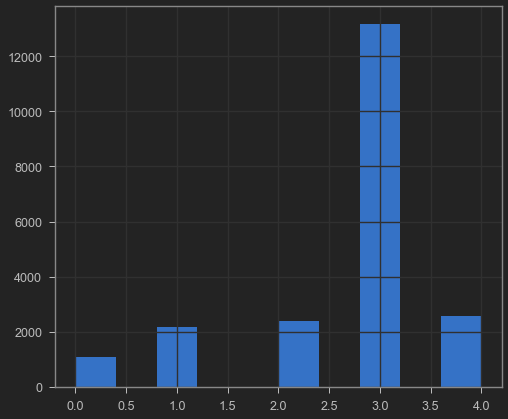

In [6]:
train.label.hist()
plt.show()

In [7]:
train.label.value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

# Visualización imágenes

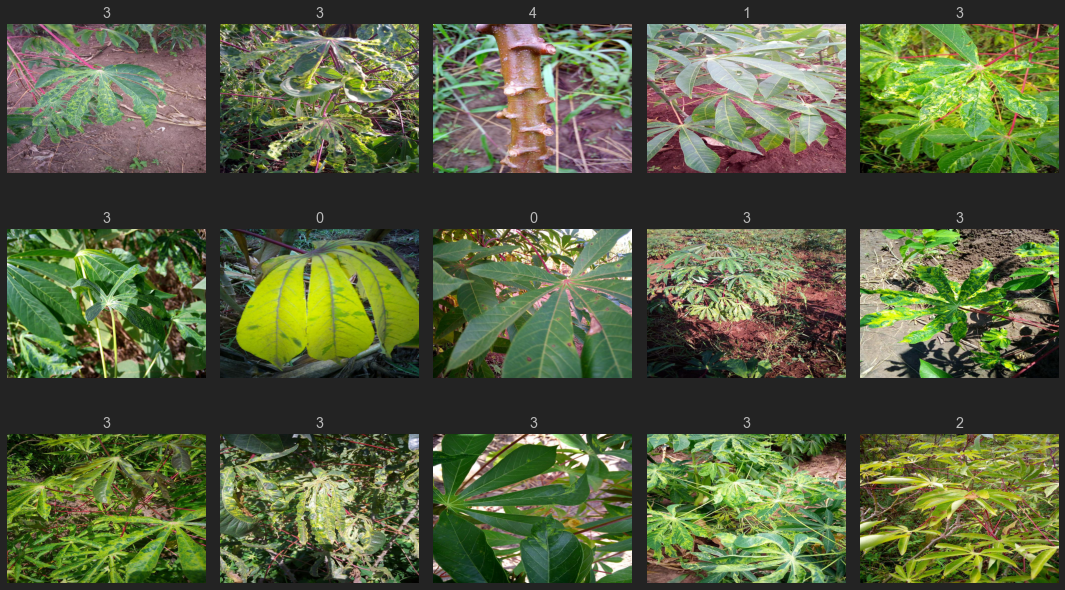

In [8]:
r, c = 3, 5
fig = plt.figure(figsize=(3*c, 3*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(train)-1)
        img = torchvision.io.read_image(str(path/train['image_id'][ix]))
        label = train['label'][ix]
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title(label)
plt.tight_layout()
plt.show()

In [9]:
img.shape, img.dtype, img.max(), img.min()

(torch.Size([3, 600, 800]),
 torch.uint8,
 tensor(255, dtype=torch.uint8),
 tensor(0, dtype=torch.uint8))

# Datos de test

In [10]:
os.listdir(path/'test_images')

['2216849948.jpg']

In [11]:
sample_submission = pd.read_csv(path/'sample_submission.csv')
sample_submission

,image_id,label
0,2216849948.jpg,4


# DataModule

In [12]:
from src import DataModule

In [13]:
dm = DataModule()

dm.setup()

Training samples:  17117
Validation samples:  4280


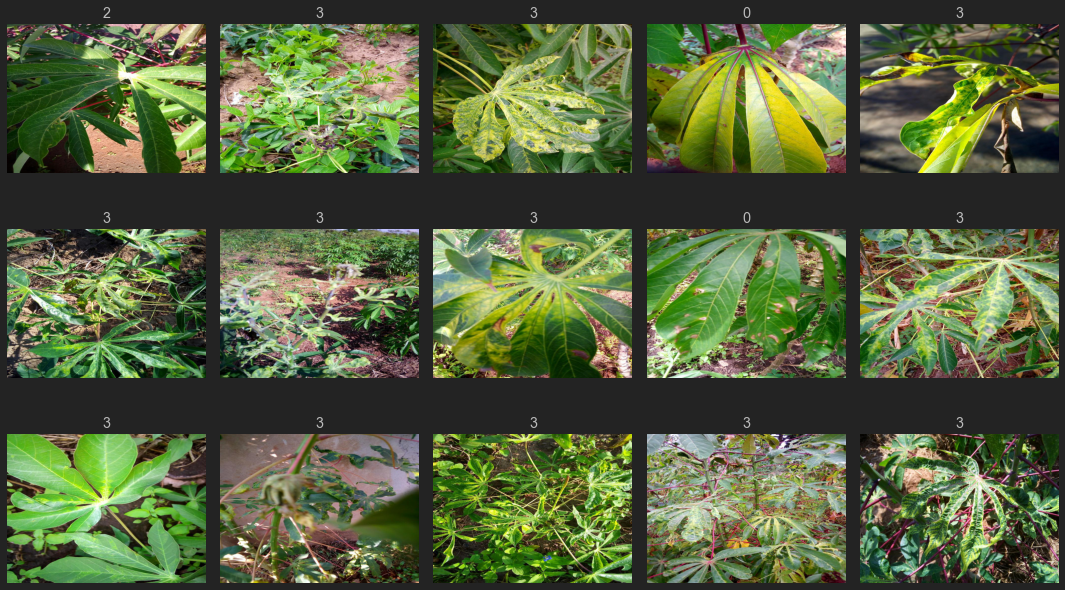

In [14]:
r, c = 3, 5
fig = plt.figure(figsize=(3*c, 3*r))
ds = dm.train_ds
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(ds)-1)
        img, label = ds[ix]
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title(label.item())
plt.tight_layout()
plt.show()

In [15]:
img.shape, img.dtype, img.max(), img.min()

(torch.Size([3, 600, 800]), torch.float32, tensor(1.), tensor(0.))

In [16]:
dl = dm.train_dataloader()

imgs, labels = next(iter(dl))

imgs.shape, imgs.dtype, imgs.max(), imgs.min()

(torch.Size([64, 3, 600, 800]), torch.float32, tensor(1.), tensor(0.))